In [1]:
import pandas as pd
import numpy as py
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv(r"C:\Users\siddaraja naik\Downloads\IMDb ratings.csv")

In [3]:
data.head()

,id,title,type,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,tvSeries,"Crime, Drama, Thriller",9.5,2219201,2008
1,tt5491994,Planet Earth II,tvMiniSeries,Documentary,9.5,161242,2016
2,tt0185906,Band of Brothers,tvMiniSeries,"Drama, History, War",9.4,542582,2001
3,tt0795176,Planet Earth,tvMiniSeries,"Documentary, Family",9.4,222775,2006
4,tt5152226,Tree of Life,tvSeries,Drama,9.4,11292,2014


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6032 non-null   object 
 1   title          6032 non-null   object 
 2   type           6032 non-null   object 
 3   genres         6032 non-null   object 
 4   averageRating  6032 non-null   float64
 5   numVotes       6032 non-null   int64  
 6   releaseYear    6032 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 330.0+ KB


In [5]:
cat_cols = data.select_dtypes(include=['object']).columns

In [6]:
cat_cols

Index(['id', 'title', 'type', 'genres'], dtype='object')

Handling multi-value Categorical Column

In [7]:
data['genres'].describe()

count      6032
unique      423
top       Drama
freq        390
Name: genres, dtype: object

In [8]:
data['genres'].isnull().sum()

0

In [9]:
data['genres'].head()

0    Crime, Drama, Thriller
1               Documentary
2       Drama, History, War
3       Documentary, Family
4                     Drama
Name: genres, dtype: object

In [10]:
data['genres'] = data['genres'].str.split(', ')

In [11]:
data['genres'].head()

0    [Crime, Drama, Thriller]
1               [Documentary]
2       [Drama, History, War]
3       [Documentary, Family]
4                     [Drama]
Name: genres, dtype: object

In [12]:
data.isnull().sum()

id               0
title            0
type             0
genres           0
averageRating    0
numVotes         0
releaseYear      0
dtype: int64

In [13]:
data

,id,title,type,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,tvSeries,"[Crime, Drama, Thriller]",9.5,2219201,2008
1,tt5491994,Planet Earth II,tvMiniSeries,[Documentary],9.5,161242,2016
2,tt0185906,Band of Brothers,tvMiniSeries,"[Drama, History, War]",9.4,542582,2001
3,tt0795176,Planet Earth,tvMiniSeries,"[Documentary, Family]",9.4,222775,2006
4,tt5152226,Tree of Life,tvSeries,[Drama],9.4,11292,2014
...,...,...,...,...,...,...,...
6027,tt3089778,The Treatment,movie,"[Crime, Mystery, Thriller]",7.1,10189,2014
6028,tt0252684,Manic,movie,[Drama],7.1,10170,2001
6029,tt0072353,Going Places,movie,"[Action, Comedy, Crime]",7.1,10123,1974
6030,tt7695916,Tell Me a Story,tvSeries,"[Drama, Thriller]",7.1,10081,2018


MultiLabelBinarizer for 'genres'

In [14]:
mlb = MultiLabelBinarizer()

In [15]:
gen_en = mlb.fit_transform(data['genres'])

In [16]:
# Create a DataFrame with the encoded genres
genres_df = pd.DataFrame(gen_en, columns=mlb.classes_)

In [17]:
data = pd.concat([data.drop(columns=['genres']), genres_df], axis=1)

In [18]:
data.head()

,id,title,type,averageRating,numVotes,releaseYear,Action,Adventure,Animation,Biography,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0903747,Breaking Bad,tvSeries,9.5,2219201,2008,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,tt5491994,Planet Earth II,tvMiniSeries,9.5,161242,2016,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0185906,Band of Brothers,tvMiniSeries,9.4,542582,2001,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,tt0795176,Planet Earth,tvMiniSeries,9.4,222775,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt5152226,Tree of Life,tvSeries,9.4,11292,2014,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6032 non-null   object 
 1   title          6032 non-null   object 
 2   type           6032 non-null   object 
 3   averageRating  6032 non-null   float64
 4   numVotes       6032 non-null   int64  
 5   releaseYear    6032 non-null   int64  
 6   Action         6032 non-null   int32  
 7   Adventure      6032 non-null   int32  
 8   Animation      6032 non-null   int32  
 9   Biography      6032 non-null   int32  
 10  Comedy         6032 non-null   int32  
 11  Crime          6032 non-null   int32  
 12  Documentary    6032 non-null   int32  
 13  Drama          6032 non-null   int32  
 14  Family         6032 non-null   int32  
 15  Fantasy        6032 non-null   int32  
 16  Film-Noir      6032 non-null   int32  
 17  Game-Show      6032 non-null   int32  
 18  History 

In [21]:
data= data.drop(columns =['id', 'title'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           6032 non-null   object 
 1   averageRating  6032 non-null   float64
 2   numVotes       6032 non-null   int64  
 3   releaseYear    6032 non-null   int64  
 4   Action         6032 non-null   int32  
 5   Adventure      6032 non-null   int32  
 6   Animation      6032 non-null   int32  
 7   Biography      6032 non-null   int32  
 8   Comedy         6032 non-null   int32  
 9   Crime          6032 non-null   int32  
 10  Documentary    6032 non-null   int32  
 11  Drama          6032 non-null   int32  
 12  Family         6032 non-null   int32  
 13  Fantasy        6032 non-null   int32  
 14  Film-Noir      6032 non-null   int32  
 15  Game-Show      6032 non-null   int32  
 16  History        6032 non-null   int32  
 17  Horror         6032 non-null   int32  
 18  Music   

One-hot encoding for 'type'

In [23]:
type_enc = pd.get_dummies(data['type'], prefix='type')


In [24]:
data = pd.concat([data.drop(columns=['type']), type_enc], axis=1)

In [25]:
data.head()

,averageRating,numVotes,releaseYear,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,type_movie,type_tvMiniSeries,type_tvSeries
0,9.5,2219201,2008,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,False,False,True
1,9.5,161242,2016,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,False,True,False
2,9.4,542582,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,False,True,False
3,9.4,222775,2006,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,False,True,False
4,9.4,11292,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,False,True


Standarizing using StandardScalar

In [26]:
scaler = StandardScaler()

In [27]:
scaled_features = scaler.fit_transform(data) #array format

In [28]:
scaled_df = pd.DataFrame(scaled_features, columns=data.columns) #convertimg from array to df

In [29]:
data.head()

,averageRating,numVotes,releaseYear,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,type_movie,type_tvMiniSeries,type_tvSeries
0,9.5,2219201,2008,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,False,False,True
1,9.5,161242,2016,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,False,True,False
2,9.4,542582,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,False,True,False
3,9.4,222775,2006,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,False,True,False
4,9.4,11292,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,False,True


In [30]:
scaled_df

,averageRating,numVotes,releaseYear,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,type_movie,type_tvMiniSeries,type_tvSeries
0,3.858088,9.291346,0.341277,-0.506106,-0.431278,-0.321477,-0.312291,-0.651399,1.833448,-0.220633,...,-0.211384,-0.034086,-0.149576,-0.053163,2.855392,-0.175382,-0.118118,-1.458983,-0.219390,1.628970
1,3.858088,0.198980,0.710878,-0.506106,-0.431278,-0.321477,-0.312291,-0.651399,-0.545420,4.532423,...,-0.211384,-0.034086,-0.149576,-0.053163,-0.350215,-0.175382,-0.118118,-1.458983,4.558089,-0.613885
2,3.643607,1.883796,0.017876,-0.506106,-0.431278,-0.321477,-0.312291,-0.651399,-0.545420,-0.220633,...,-0.211384,-0.034086,-0.149576,-0.053163,-0.350215,5.701852,-0.118118,-1.458983,4.558089,-0.613885
3,3.643607,0.470842,0.248877,-0.506106,-0.431278,-0.321477,-0.312291,-0.651399,-0.545420,4.532423,...,-0.211384,-0.034086,-0.149576,-0.053163,-0.350215,-0.175382,-0.118118,-1.458983,4.558089,-0.613885
4,3.643607,-0.463521,0.618477,-0.506106,-0.431278,-0.321477,-0.312291,-0.651399,-0.545420,-0.220633,...,-0.211384,-0.034086,-0.149576,-0.053163,-0.350215,-0.175382,-0.118118,-1.458983,-0.219390,1.628970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6027,-1.289443,-0.468394,0.618477,-0.506106,-0.431278,-0.321477,-0.312291,-0.651399,1.833448,-0.220633,...,-0.211384,-0.034086,-0.149576,-0.053163,2.855392,-0.175382,-0.118118,0.685409,-0.219390,-0.613885
6028,-1.289443,-0.468478,0.017876,-0.506106,-0.431278,-0.321477,-0.312291,-0.651399,-0.545420,-0.220633,...,-0.211384,-0.034086,-0.149576,-0.053163,-0.350215,-0.175382,-0.118118,0.685409,-0.219390,-0.613885
6029,-1.289443,-0.468686,-1.229526,1.975871,-0.431278,-0.321477,-0.312291,1.535157,1.833448,-0.220633,...,-0.211384,-0.034086,-0.149576,-0.053163,-0.350215,-0.175382,-0.118118,0.685409,-0.219390,-0.613885
6030,-1.289443,-0.468872,0.803278,-0.506106,-0.431278,-0.321477,-0.312291,-0.651399,-0.545420,-0.220633,...,-0.211384,-0.034086,-0.149576,-0.053163,2.855392,-0.175382,-0.118118,-1.458983,-0.219390,1.628970


K-Means


In [31]:
n_clusters = 3 #random 2 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [32]:
kmeans.fit(scaled_features)

C:\Users\siddaraja naik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [33]:
# Add the cluster labels to the original data
data['cluster'] = kmeans.labels_

In [34]:
cluster_analysis = data.groupby('cluster').mean()

In [35]:
cluster_analysis

,averageRating,numVotes,releaseYear,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,type_movie,type_tvMiniSeries,type_tvSeries
cluster,,,,,,,,,,,,,,,,,,,,,
0,7.759139,218793.200233,2003.071013,0.675204,0.863795,0.558789,0.008149,0.285215,0.031432,0.002328,...,0.090803,0.000000,0.001164,0.000000,0.022119,0.004657,0.000000,0.563446,0.034924,0.401630
1,7.580359,114718.237293,1995.069613,0.131768,0.041436,0.008840,0.124862,0.269613,0.242818,0.057459,...,0.028177,0.000000,0.028453,0.000000,0.137293,0.043094,0.019890,1.000000,0.000000,0.000000
2,7.950805,62926.850612,2012.175145,0.111397,0.034771,0.034127,0.049581,0.370895,0.307147,0.045074,...,0.050225,0.004507,0.018030,0.010947,0.092080,0.012878,0.007083,0.000000,0.159047,0.840953


Using Scatter Plot

In [39]:
import matplotlib.pyplot as plt

In [40]:
feature_x = data['averageRating']  
feature_y = data['numVotes']        
clusters = data['cluster']

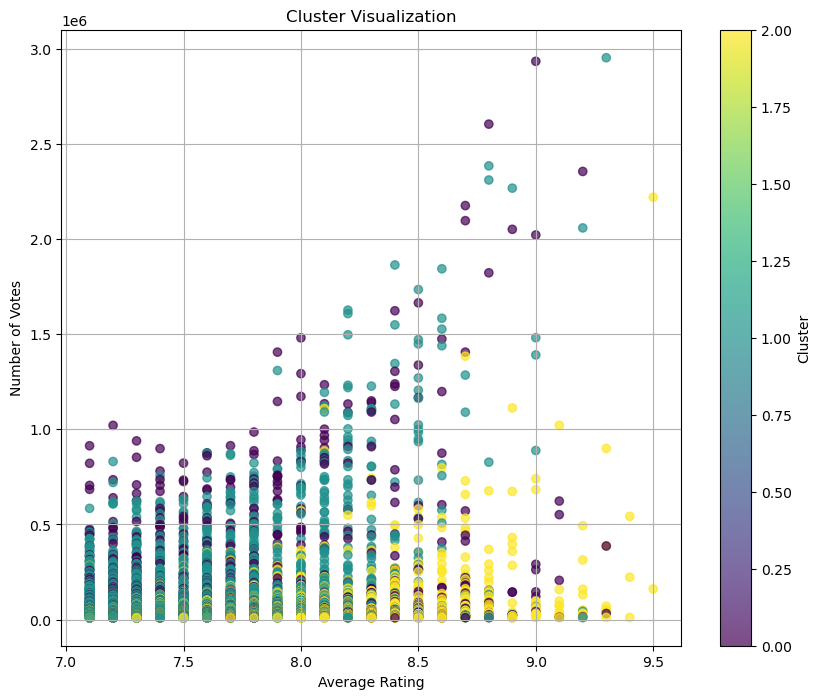

In [41]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(feature_x, feature_y, c=clusters, cmap='viridis', alpha=0.7)
plt.title('Cluster Visualization')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()